In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# https://archive.ics.uci.edu/ml/datasets/Yeast


https://archive.ics.uci.edu/ml/datasets/Yeast

* Analizar data
* Aplicar modelo de Random forest 
* Clusterizacion con k-means
* Afinar hyperparametros



In [ ]:
data = pd.read_csv("yeast.data", header=None, delimiter=r"\s+")
data.columns = ["sequence_name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "class"]

print(data.head())

  sequence_name   mcg   gvh   alm   mit  erl  pox   vac   nuc class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT


## Análisis de los datos

In [ ]:
# Numero de filas y columnas: (1484, 10)
print(data.shape, "\n")

# Descripcion de la data numerica, se puede observar que los datos estan normalizados, estan en una escala de 0 a 1
print(data.describe(), "\n")

(1484, 10) 

               mcg          gvh  ...          vac          nuc
count  1484.000000  1484.000000  ...  1484.000000  1484.000000
mean      0.500121     0.499933  ...     0.499885     0.276199
std       0.137299     0.123924  ...     0.057797     0.106491
min       0.110000     0.130000  ...     0.000000     0.000000
25%       0.410000     0.420000  ...     0.480000     0.220000
50%       0.490000     0.490000  ...     0.510000     0.220000
75%       0.580000     0.570000  ...     0.530000     0.300000
max       1.000000     1.000000  ...     0.730000     1.000000

[8 rows x 8 columns] 



In [ ]:
# Se puede observar que la data no tiene nulos
print(data.isnull().any())

sequence_name    False
mcg              False
gvh              False
alm              False
mit              False
erl              False
pox              False
vac              False
nuc              False
class            False
dtype: bool


CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64


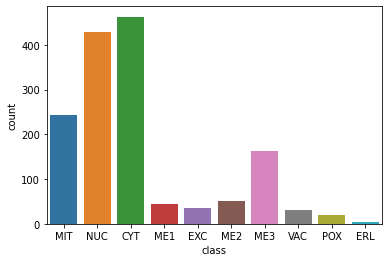

In [ ]:
print(data["class"].value_counts())
sns.countplot(x="class", data=data)

In [ ]:
# Número de acceso a la base de datos SWISS-PROT
# Se observa que este parametro no es muy relevante debido a que presenta 1462 variables unicas de un total de 1484, y al no ser cuantitativa, no es posible agruparlas
print(data["sequence_name"].value_counts())

RL2_YEAST     2
RS8_YEAST     2
RS22_YEAST    2
RL1A_YEAST    2
RL41_YEAST    2
             ..
CSG2_YEAST    1
PHO4_YEAST    1
R19A_YEAST    1
DLDH_YEAST    1
CC40_YEAST    1
Name: sequence_name, Length: 1462, dtype: int64


## Separación de variables dependientes e independientes

In [ ]:
X = data.copy()
X.drop(["sequence_name", "class"], axis=1, inplace=True)

y = data.iloc[:, [9]]

print(X.head())
print(y.head())

    mcg   gvh   alm   mit  erl  pox   vac   nuc
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
  class
0   MIT
1   MIT
2   MIT
3   NUC
4   MIT


## Primer intento de Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

def runModel(X, y, model):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(confusion_matrix(y_test, predictions), "\n")
  print(classification_report(y_test, predictions))

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
runModel(X, y, rfc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[89  0  0  0  4  7 20  0  0]
 [ 0  6  2  0  0  2  0  0  1]
 [ 0  1  9  1  0  0  0  0  0]
 [ 3  0  1  7  2  4  2  0  0]
 [ 2  0  0  0 45  1  1  0  0]
 [26  0  1  1  2 54  6  1  0]
 [47  0  0  2 10  3 69  0  0]
 [ 4  0  0  0  0  0  0  2  0]
 [ 4  0  0  1  1  1  1  0  0]] 

              precision    recall  f1-score   support

         CYT       0.51      0.74      0.60       120
         EXC       0.86      0.55      0.67        11
         ME1       0.69      0.82      0.75        11
         ME2       0.58      0.37      0.45        19
         ME3       0.70      0.92      0.80        49
         MIT       0.75      0.59      0.66        91
         NUC       0.70      0.53      0.60       131
         POX       0.67      0.33      0.44         6
         VAC       0.00      0.00      0.00         8

    accuracy                           0.63       446
   macro avg       0.61      0.54      0.55       446
weighted avg       0.64      0.63      0.62       446



In [ ]:
from sklearn.model_selection import GridSearchCV
# https://github.com/augaonkar/Hands-On-Machine-Learning/blob/master/Hands-On%20Machine%20Learning%20with%20Scikit-Lear%20-%20Aurelien%20Geron.pdf
# When you have no idea what value a hyperparameter should have, a simple
# approach is to try out consecutive powers of 10 (or a smaller number if you want a
# more fine-grained search, as shown in this example with the n_estimators
# hyperparameter [3, 10]).

param_grid = {'n_estimators': [3, 10, 30],
               'criterion': ('gini', 'entropy'),
               'max_depth': [2, 4, 10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]
              }

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

runModel(X, y, rf_Grid)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 444 tasks      | elapsed:   15.7s


[[95  0  0  0  2  3  9 23  1  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 2  0  5  4  0  0  2  0  0  0]
 [ 0  0  2  8  1  0  0  0  0  0]
 [ 0  0  1  4  6  1  2  2  0  0]
 [ 0  0  0  0  1 43  1  3  0  0]
 [22  0  0  0  2  3 40  3  2  0]
 [51  0  1  0  0  4 13 64  0  0]
 [ 2  0  1  0  0  1  0  0  2  0]
 [ 7  0  0  3  0  1  1  0  0  0]] 

              precision    recall  f1-score   support

         CYT       0.53      0.71      0.61       133
         ERL       1.00      1.00      1.00         2
         EXC       0.50      0.38      0.43        13
         ME1       0.42      0.73      0.53        11
         ME2       0.50      0.38      0.43        16
         ME3       0.77      0.90      0.83        48
         MIT       0.59      0.56      0.57        72
         NUC       0.67      0.48      0.56       133
         POX       0.40      0.33      0.36         6
         VAC       0.00      0.00      0.00        12

    accuracy                           0.59       446
   macro avg     

[Parallel(n_jobs=4)]: Done 864 out of 864 | elapsed:   26.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K means


In [ ]:
data["class"].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64

In [ ]:
# Se tienen 10 tipos de clases, por tatnto se usará 10 clusters como parametro para el modelo
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 7, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
data.head()

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [ ]:
data_class = data.copy()
data_class["class_kmeans"] = kmeans.labels_

data_class.head()

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class,class_kmeans
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT,0
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT,7
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT,0
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC,2
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT,6


In [ ]:
# Muestra gráficos de puntos de todas las posibles combinaciones de 2 variables independientes junto con su respectiva clase, con el fin de encontrar agrupamientos y relacionarla con la clasificación del modelo k-means
for col in X.columns:
  for col2 in X.columns:
    sns.lmplot(x=col, y=col2, data=data_class, hue="class", fit_reg=False, height=6, aspect=1).fig.suptitle(f"{col} v {col2}")
    plt.show()
    plt.close('all')

In [ ]:
# Graficos de todas las posibles combinaciones de las variables independientes junto con su respectiva clase resultante del modelo k-means
for col in X.columns:
  for col2 in X.columns:
    sns.lmplot(x=col, y=col2, data=data_class, hue="class_kmeans", fit_reg=False, height=6, aspect=1).fig.suptitle(f"{col} v {col2}")
    plt.show()
    plt.close('all')

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64


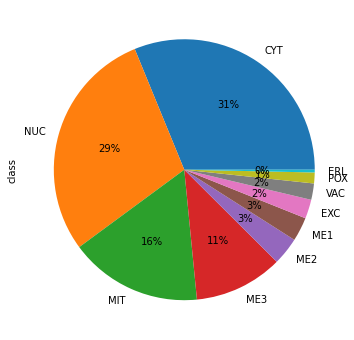

In [ ]:
print(data_class["class"].value_counts())
plt.figure(figsize=(6,6))
data_class["class"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

2    296
1    204
0    185
7    176
3    169
4    131
8    130
9     98
6     80
5     15
Name: class_kmeans, dtype: int64


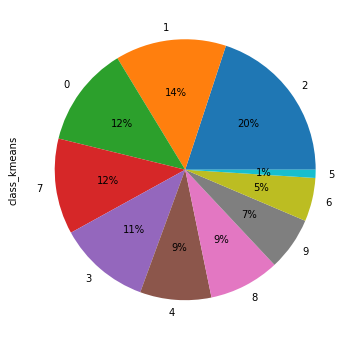

In [ ]:
print(data_class["class_kmeans"].value_counts())
plt.figure(figsize=(6,6))
data_class["class_kmeans"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

# Se observa que a diferencia de la clasificacion del dataset, la clasificacion del k-means es mas uniforme

Se observa que, al comparar la variable dependiente con la predicción del modelo usando el método de k-means, es muy dificil agrupar certeramente cada tipo

In [ ]:
# https://www.eecis.udel.edu/~shatkay/Course/papers/HortonNakai1.pdf

# https://open.bu.edu/bitstream/handle/2144/1534/2004-006-nearest-neighbor-classifiers.pdf?sequence=1&isAllowed=y

In [ ]:
# TODO: Aplicar isolation forest
# https://www.youtube.com/watch?v=hkXPdkPfgoo&ab_channel=AIEngineering
# https://www.youtube.com/watch?v=TP3wdwD8JVY&ab_channel=DecisionForest

# No Aplicar cross validation aqui, "random forest nos da un cross validation gratuito"
# Verificar si es necesario una selección de variables, random forest lo incluye
# Revisar la pureza del arbol, la pureza nos lo da la entropia y gini
# R54
# Matriz de similitud, python no la tiene
# Revisar entropia y datos que no son relevantes para el random forest

## Buscando incrementar la precision del modelo Random Forest

In [ ]:
from sklearn.ensemble import IsolationForest

isol_model = IsolationForest(contamination=0.2, n_estimators=200)
isol_model.fit(X)
pd.Series(isol_model.predict(X)).value_counts()

 1    1187
-1     297
dtype: int64

In [ ]:
data_c = data_class.copy()
data_c["i_forest"] = pd.Series(isol_model.predict(data))
data_c.loc[data_c["i_forest"] == -1]["class"].value_counts()

NUC    73
CYT    60
MIT    40
ME1    33
ME3    29
ME2    23
EXC    16
POX    12
VAC     6
ERL     5
Name: class, dtype: int64

In [ ]:
print(data_class["class"].value_counts())

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64


## El metodo de isolation forest se ve afectado por la poca cantidad de datos en ciertas clases, se eliminará las clases que representen menos del 10% de la data

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64


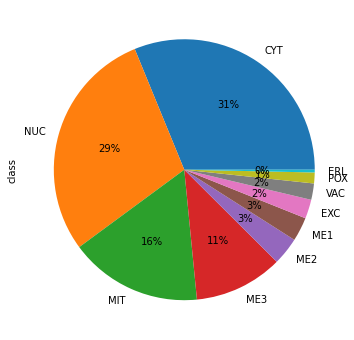

In [ ]:
print(data_class["class"].value_counts())
plt.figure(figsize=(6,6))
data_class["class"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

# En esta parte solo se usaran las clases CYT    NUC    MIT    ME3    

In [ ]:
# Pruebas con 4 y 3 clases
# Prueba con 3
reduced_data = data.loc[data["class"].isin(['CYT','NUC','MIT'])]
reduced_data["class"].value_counts()

CYT    463
NUC    429
MIT    244
Name: class, dtype: int64

Aplicando el modelo de random forest a esta data con 4 clases

In [ ]:
reduced_X = reduced_data.copy()
reduced_X.drop(["sequence_name", "class"], axis=1, inplace=True)

reduced_y = reduced_data.iloc[:, [9]]

rfc = RandomForestClassifier(n_estimators=200)
runModel(reduced_X, reduced_y, rfc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[98  9 37]
 [21 43 14]
 [36  5 78]] 

              precision    recall  f1-score   support

         CYT       0.63      0.68      0.66       144
         MIT       0.75      0.55      0.64        78
         NUC       0.60      0.66      0.63       119

    accuracy                           0.64       341
   macro avg       0.66      0.63      0.64       341
weighted avg       0.65      0.64      0.64       341



In [ ]:
param_grid = {'n_estimators': [3, 10, 30],
               'criterion': ('gini', 'entropy'),
               'max_depth': [2, 4, 10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]
              }

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

runModel(reduced_X, reduced_y, rf_Grid)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 468 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 857 out of 864 | elapsed:   23.3s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 864 out of 864 | elapsed:   23.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[[97 15 33]
 [20 43  8]
 [37  9 79]] 

              precision    recall  f1-score   support

         CYT       0.63      0.67      0.65       145
         MIT       0.64      0.61      0.62        71
         NUC       0.66      0.63      0.64       125

    accuracy                           0.64       341
   macro avg       0.64      0.64      0.64       341
weighted avg       0.64      0.64      0.64       341



## Prueba con isolationforest, se toma un 10% como posible contaminacion (no se logró mejorar la precisión)

In [ ]:
# Prueba con isolationforest, se toma un 10% como posible contaminacion
isol_model = IsolationForest(contamination=0.1, n_estimators=200)
isol_model.fit(reduced_X)
pd.Series(isol_model.predict(reduced_X)).value_counts()
data_c = reduced_data.copy()
data_c["i_forest"] = pd.Series(isol_model.predict(reduced_X))
data_c["i_forest"].value_counts()

 1.0    809
-1.0     95
Name: i_forest, dtype: int64

In [ ]:
# data_c[data_c["i_forest"] == 1]
new_X = data_c[data_c["i_forest"] == 1].copy()
new_X.drop(["sequence_name", "class","i_forest"], axis=1, inplace=True)

new_y = data_c[data_c["i_forest"] == 1].iloc[:, [9]]
runModel(new_X, new_y, rfc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[52  7 28]
 [18 38 11]
 [31  3 55]] 

              precision    recall  f1-score   support

         CYT       0.51      0.60      0.55        87
         MIT       0.79      0.57      0.66        67
         NUC       0.59      0.62      0.60        89

    accuracy                           0.60       243
   macro avg       0.63      0.59      0.61       243
weighted avg       0.62      0.60      0.60       243



## Comparación de la clasificación de la data con 3 clases con el modelo de K-means

In [ ]:
reduced_data["class"].value_counts()

CYT    463
NUC    429
MIT    244
Name: class, dtype: int64

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_
reduced_data_class = reduced_data.copy()
reduced_data_class["class_kmeans"] = kmeans.labels_
reduced_data_class.head()

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class,class_kmeans
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT,0
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT,0
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT,0
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC,0
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT,1


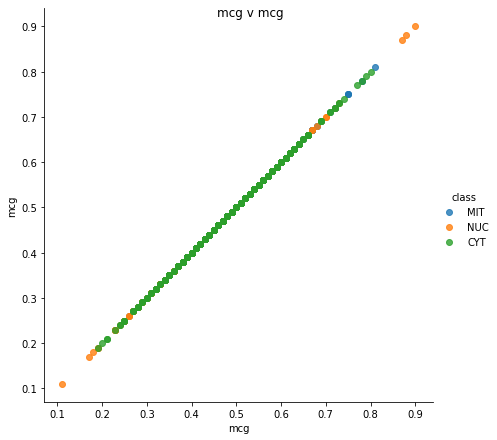

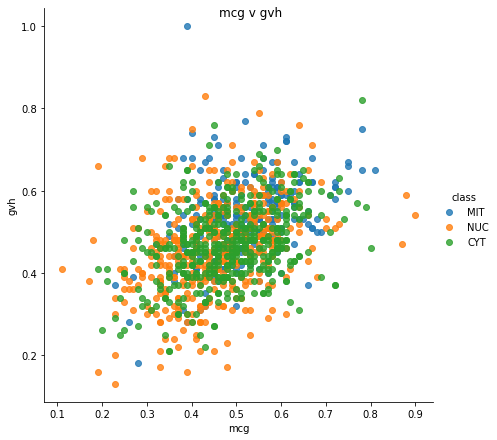

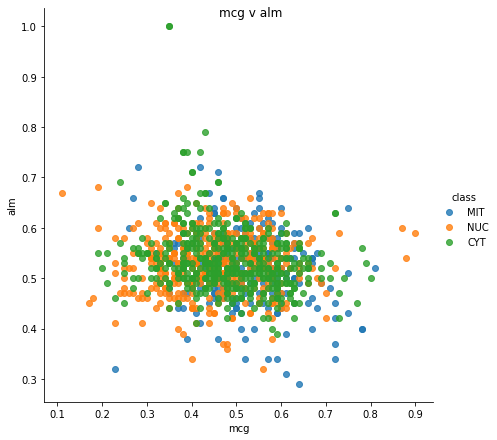

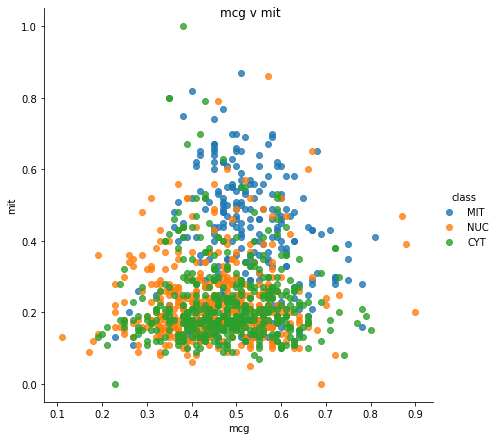

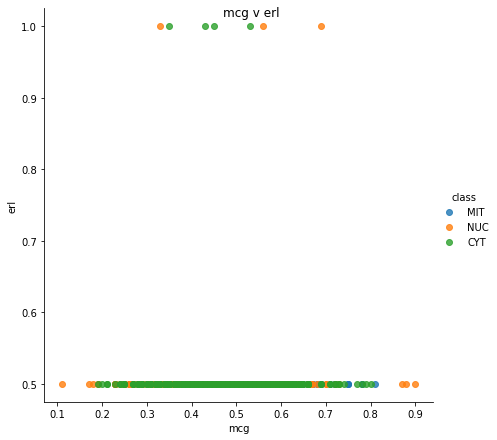

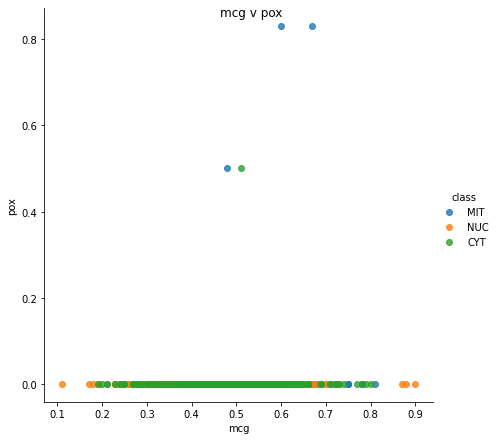

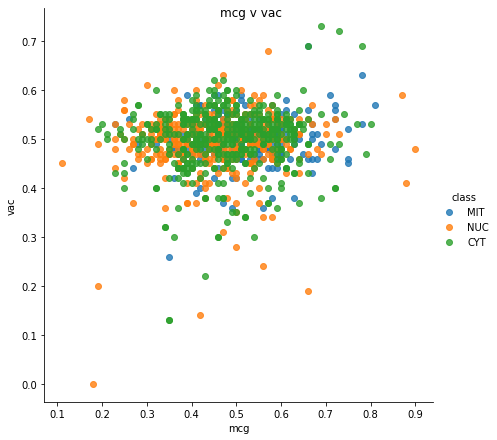

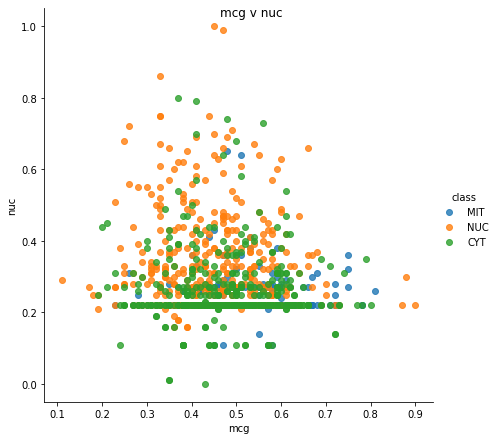

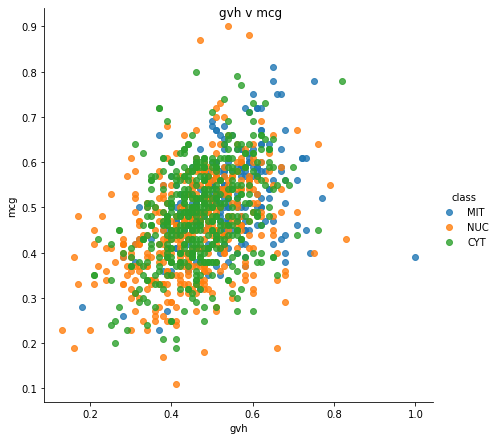

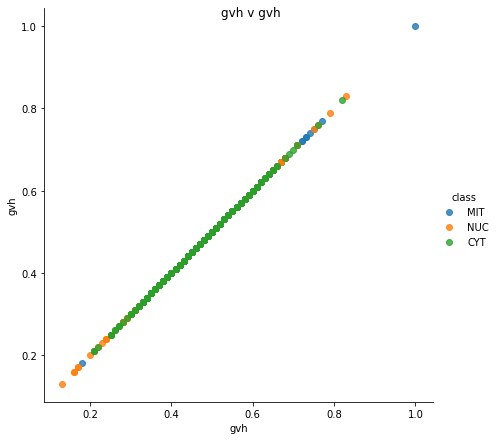

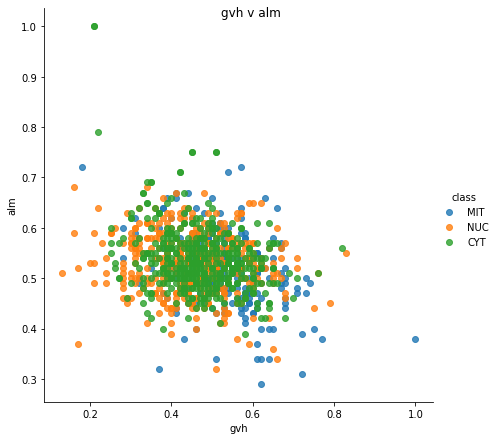

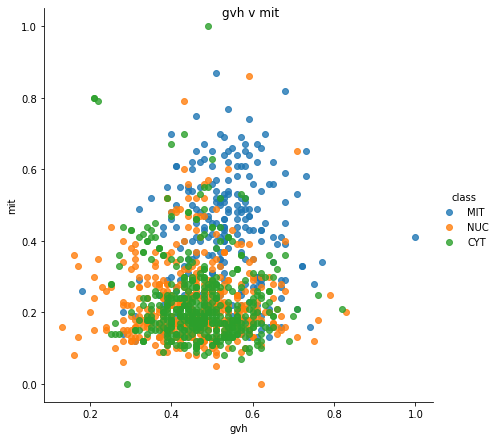

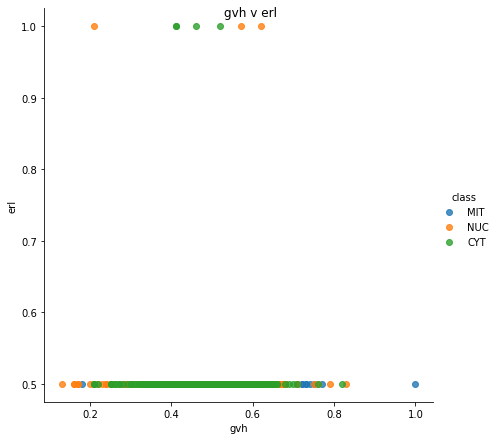

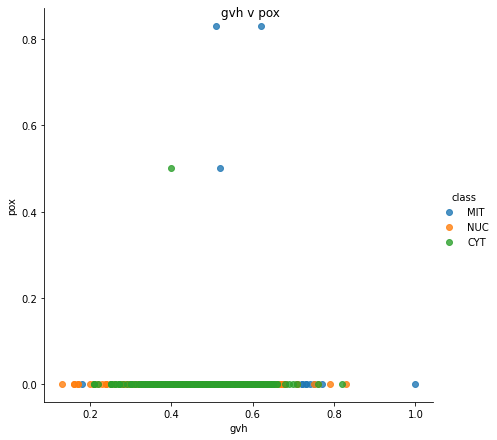

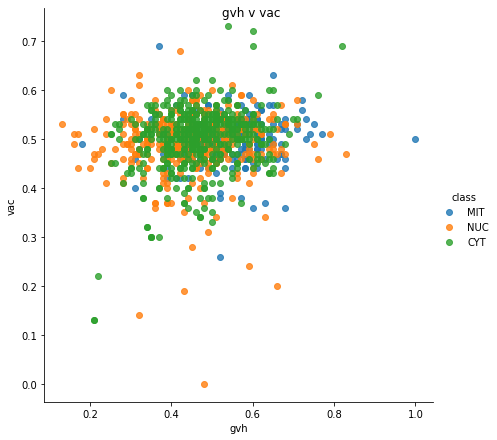

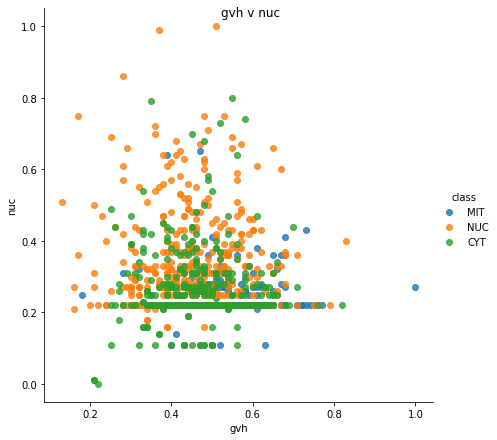

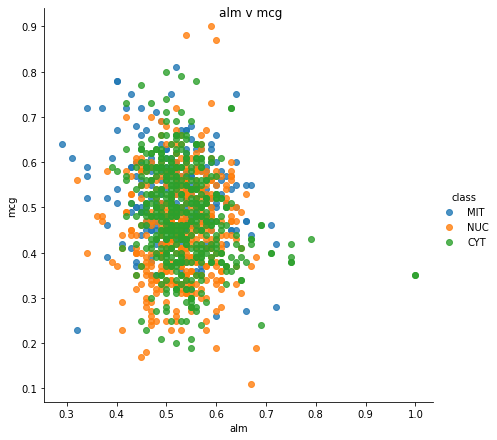

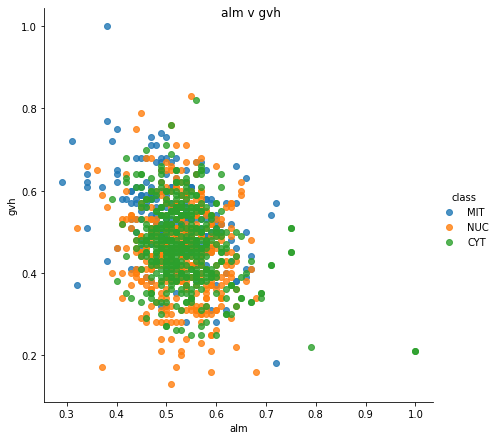

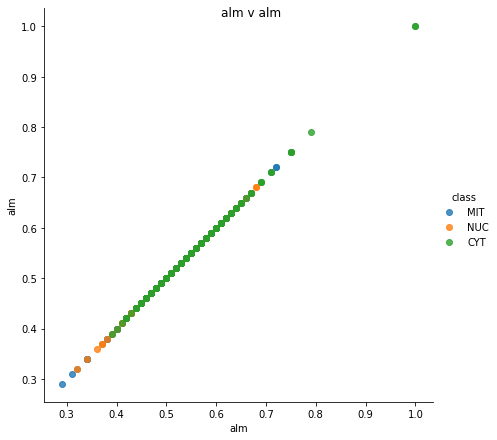

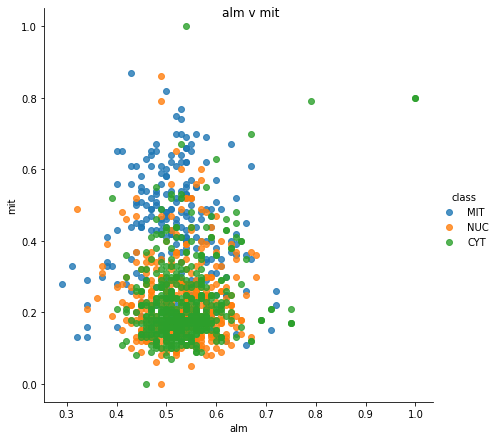

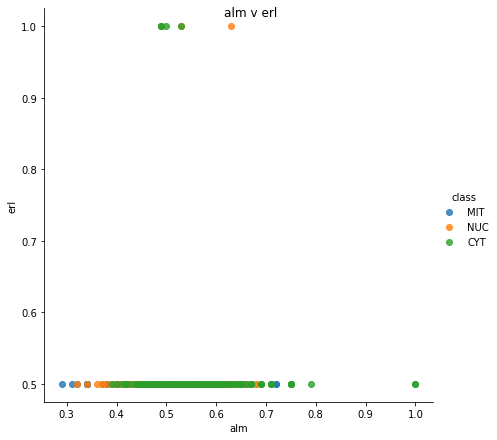

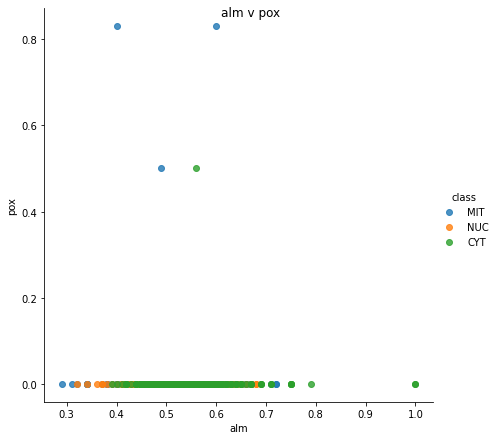

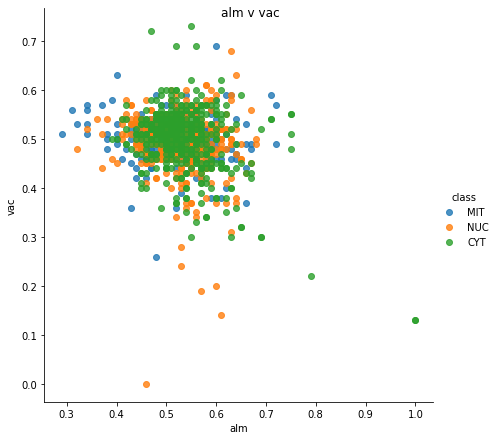

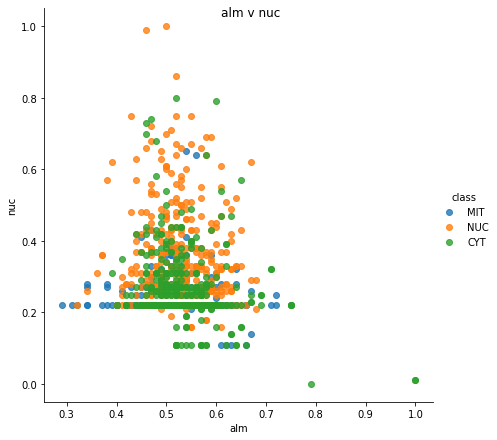

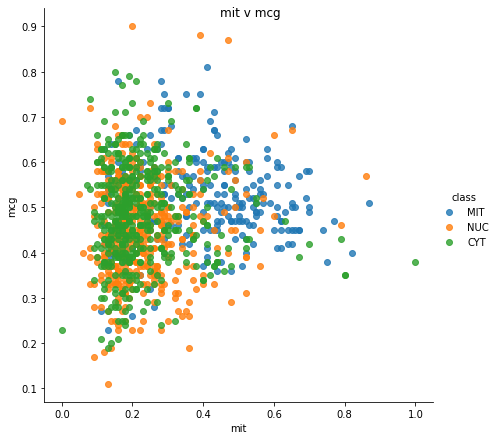

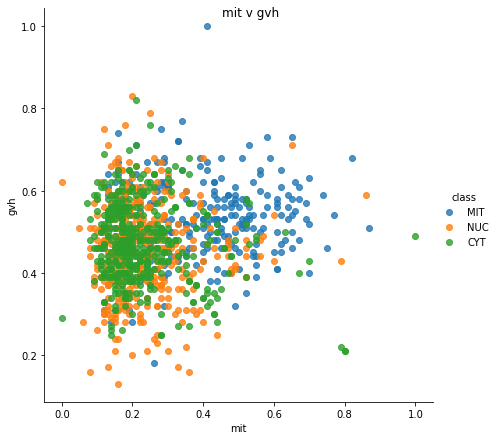

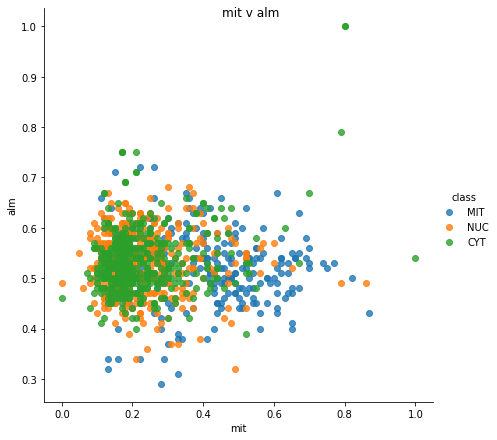

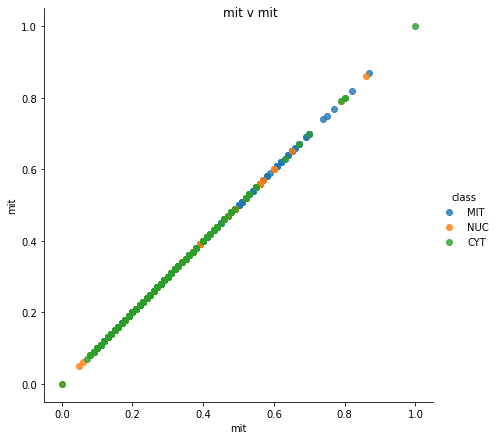

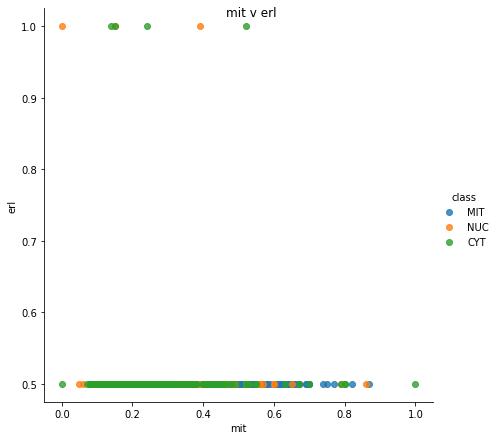

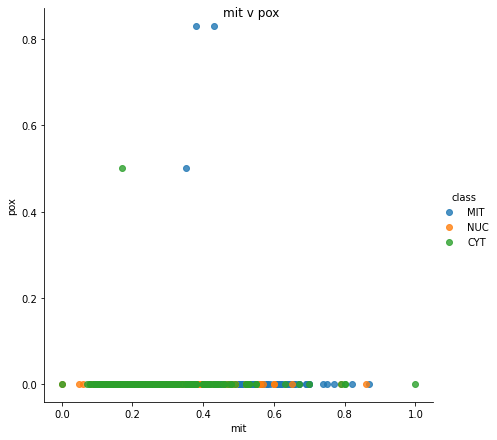

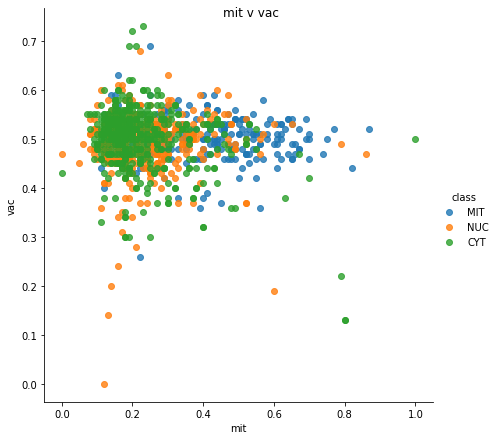

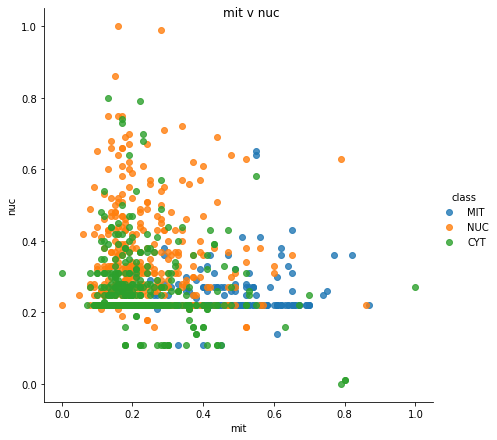

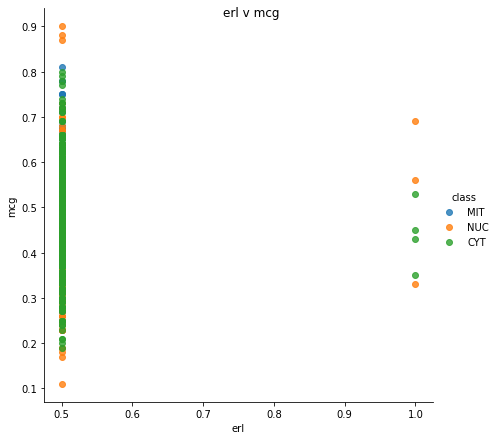

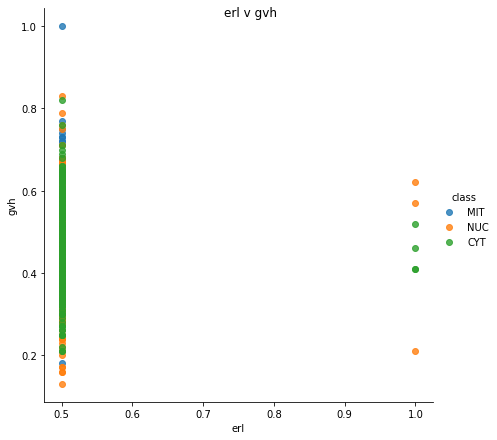

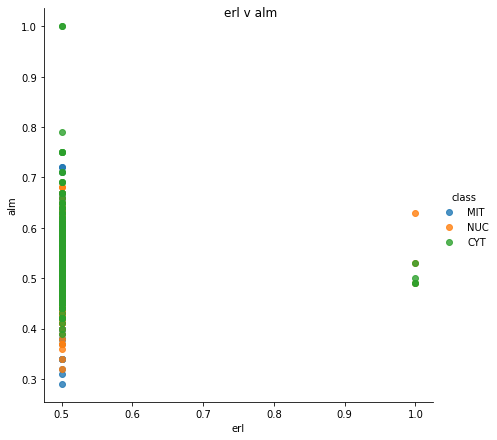

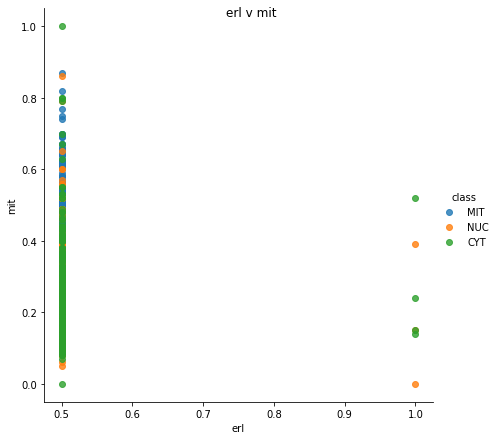

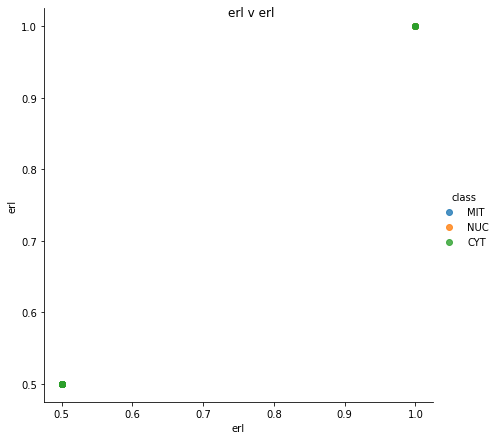

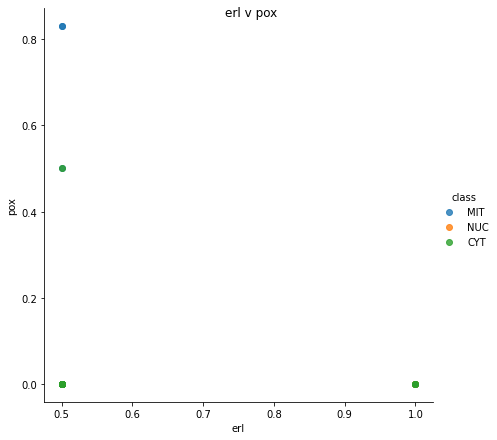

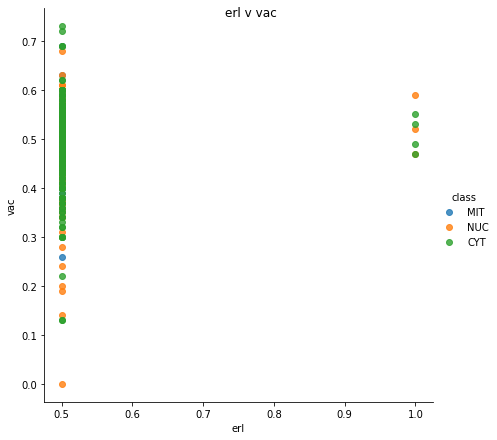

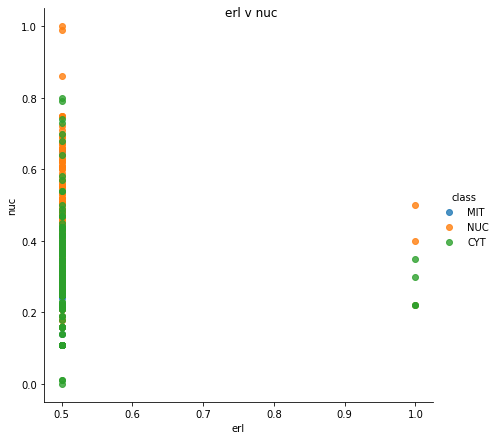

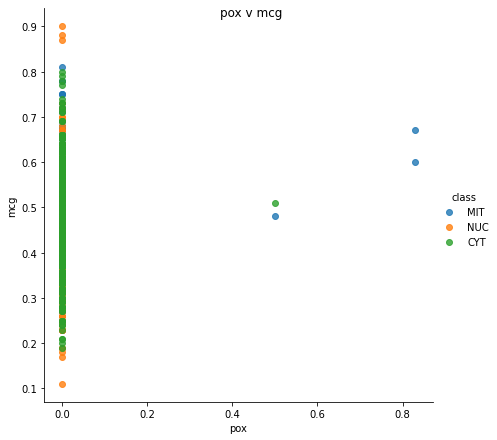

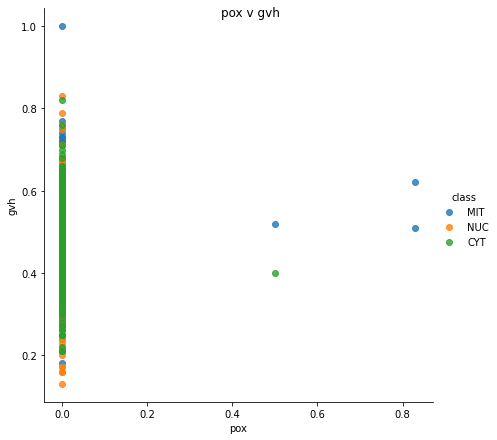

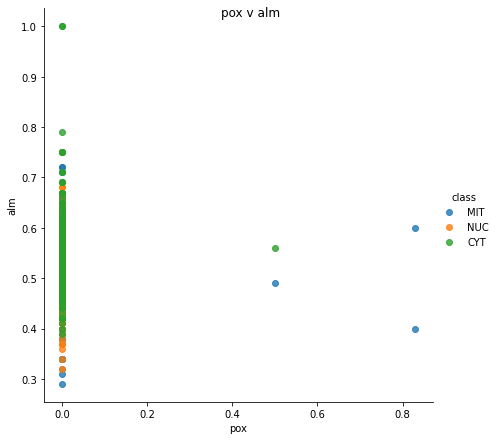

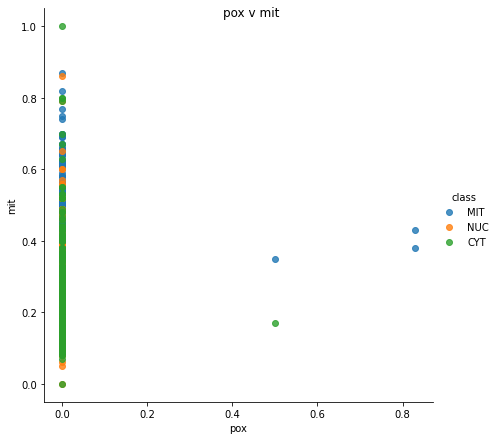

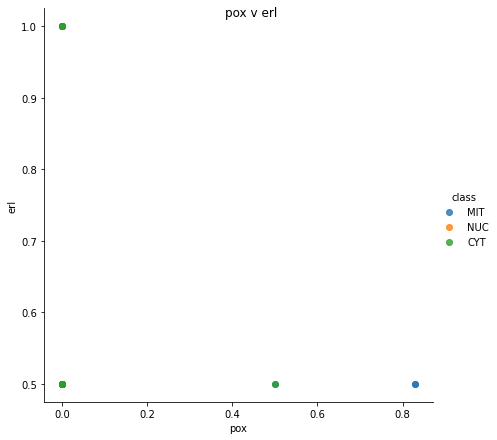

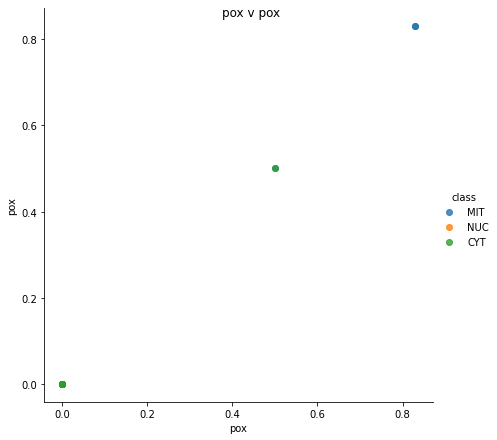

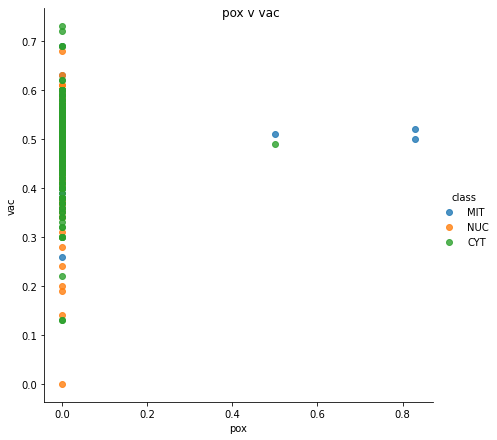

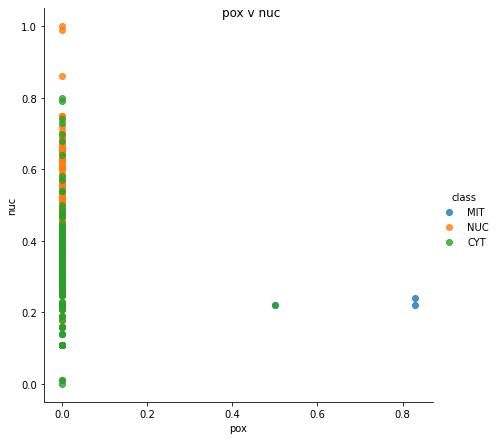

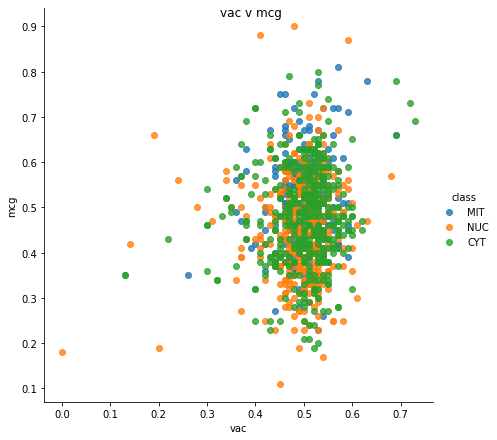

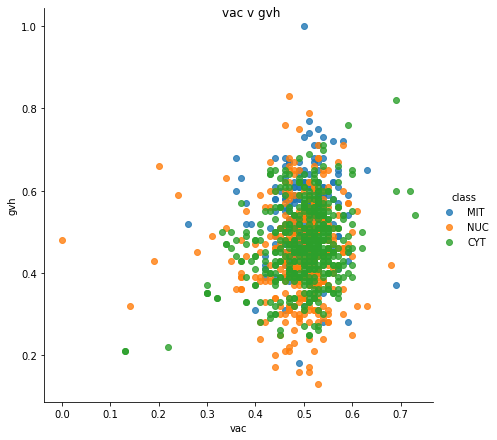

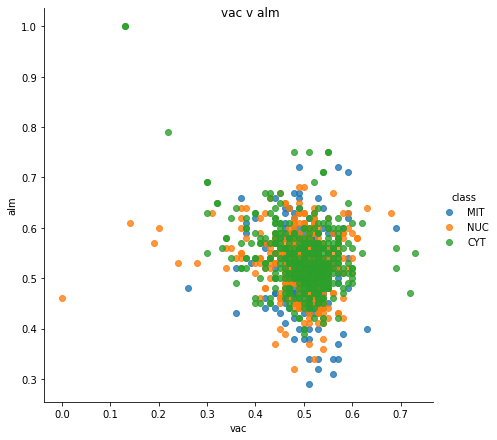

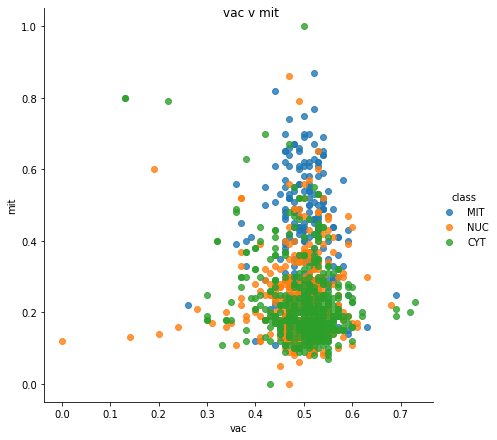

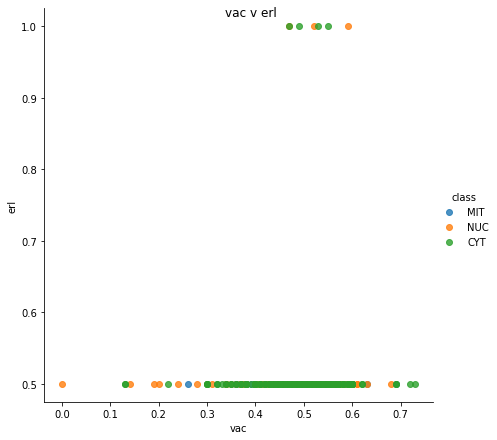

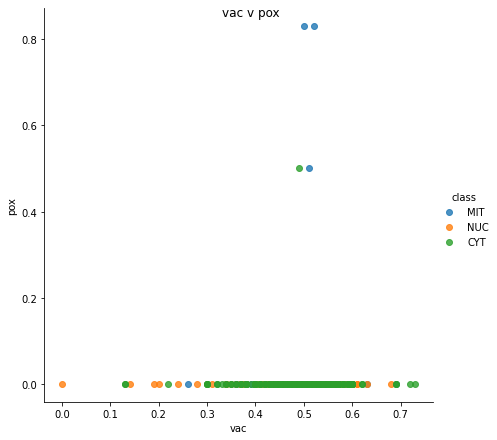

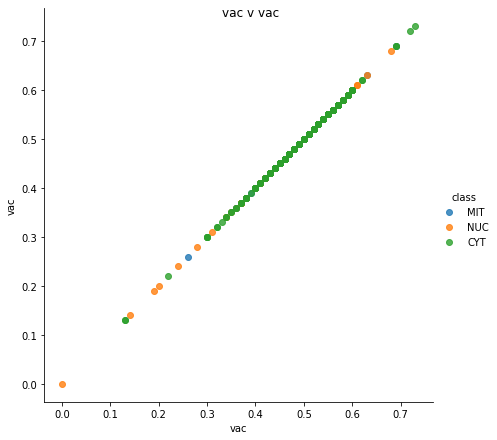

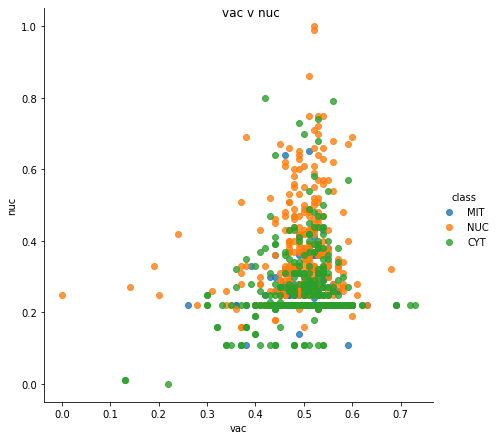

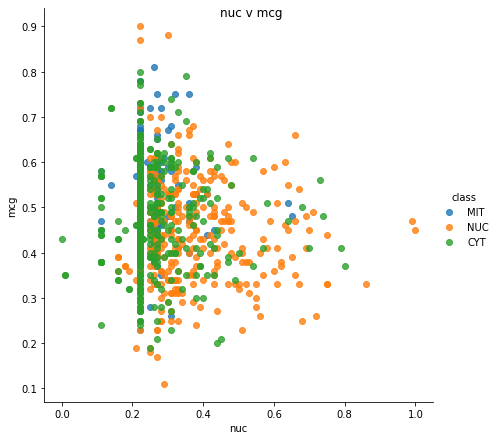

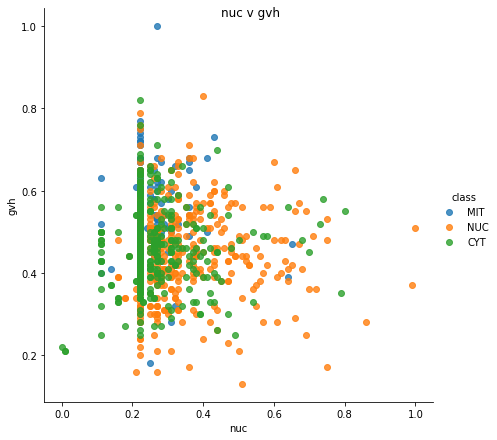

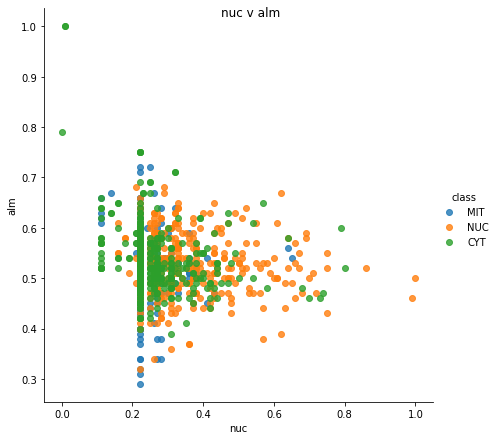

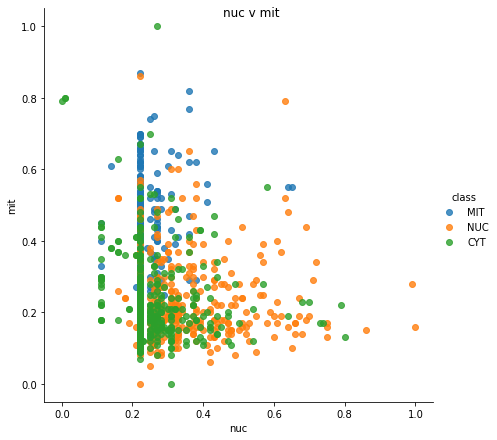

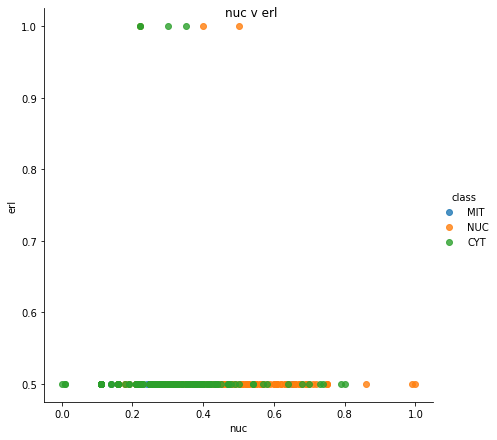

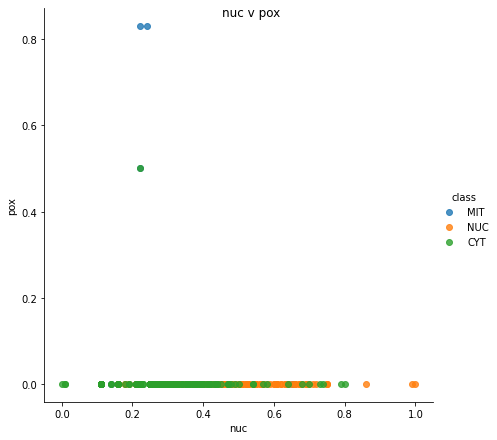

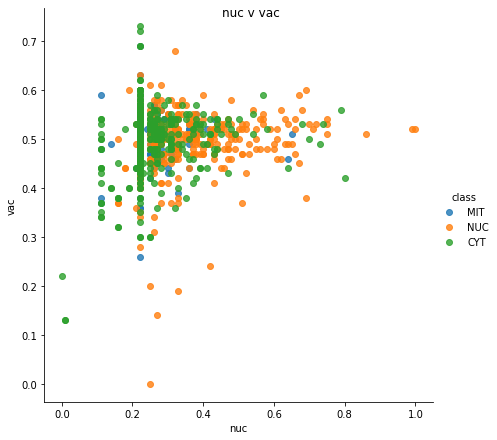

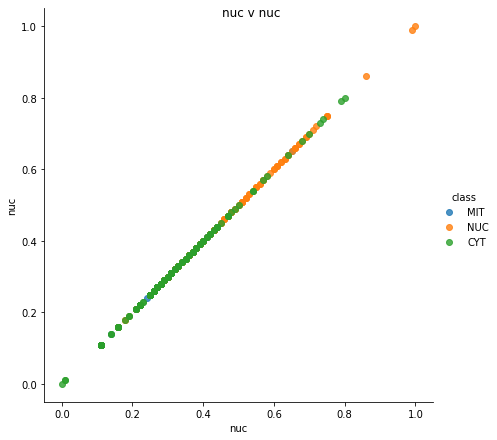

In [ ]:
for col in reduced_X.columns:
  for col2 in reduced_X.columns:
    sns.lmplot(x=col, y=col2, data=reduced_data_class, hue="class", fit_reg=False, height=6, aspect=1).fig.suptitle(f"{col} v {col2}")
    plt.show()
    plt.close('all')

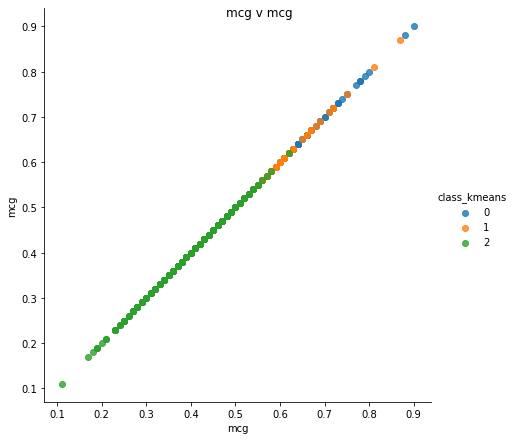

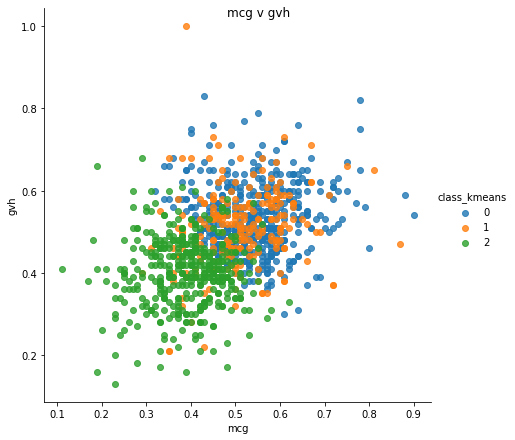

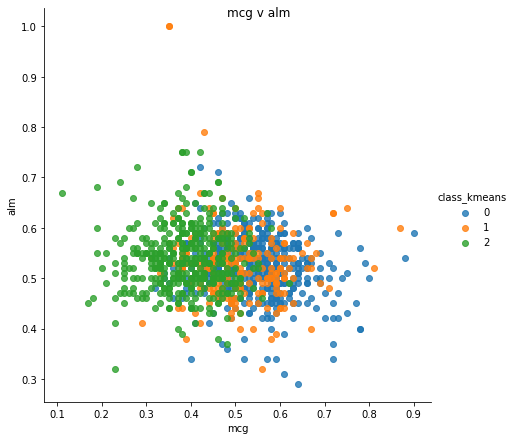

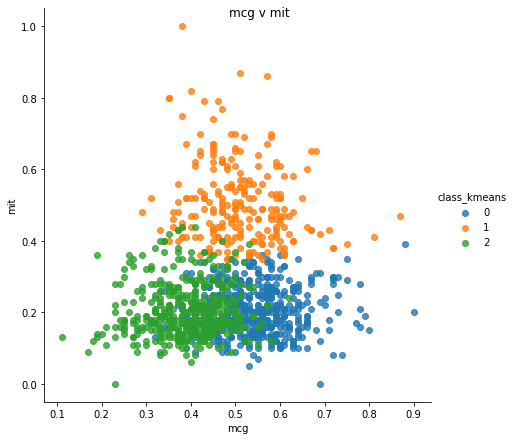

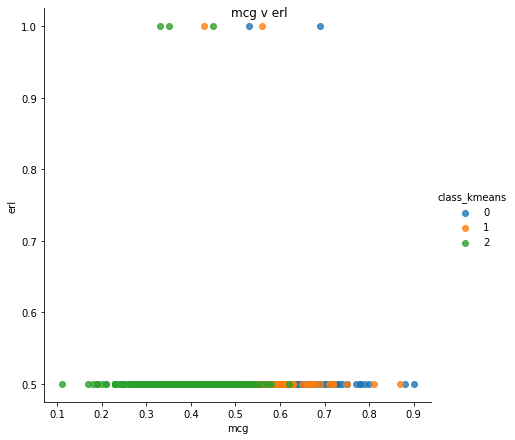

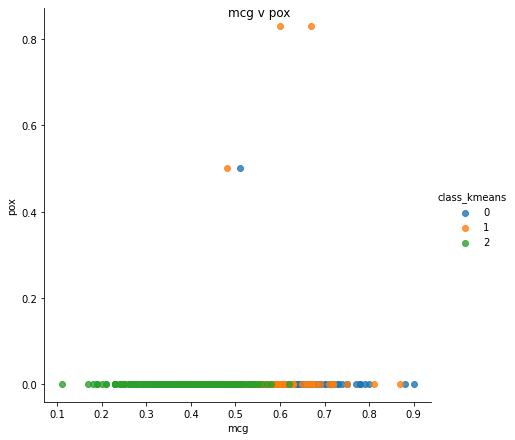

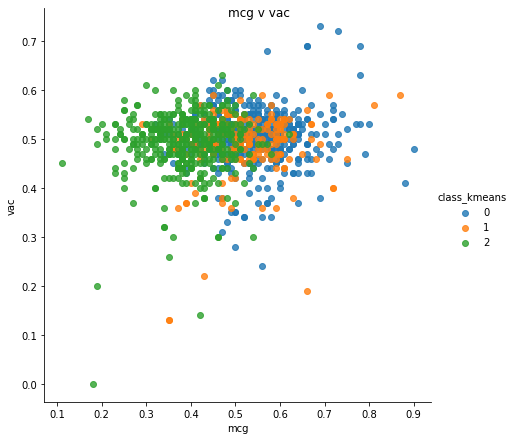

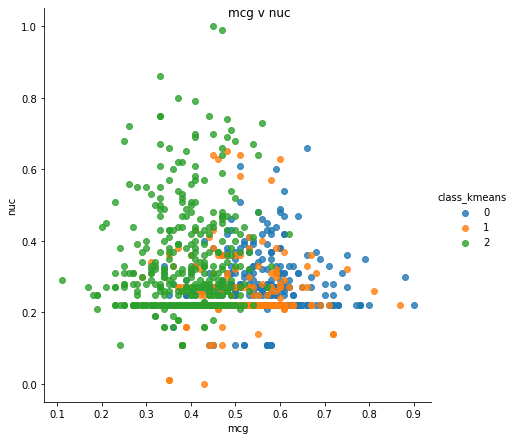

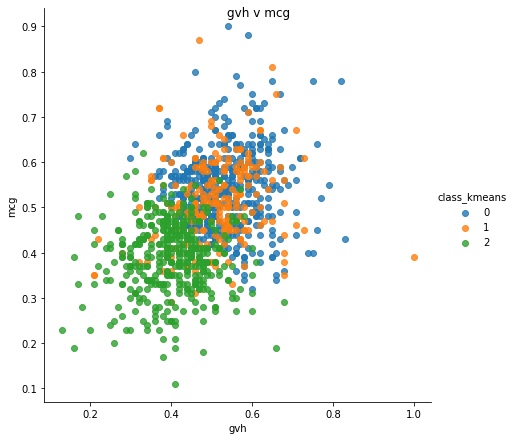

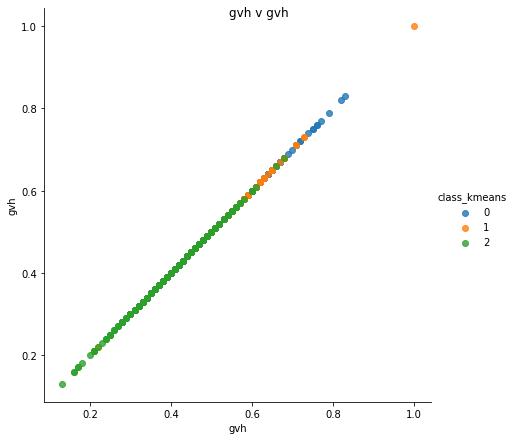

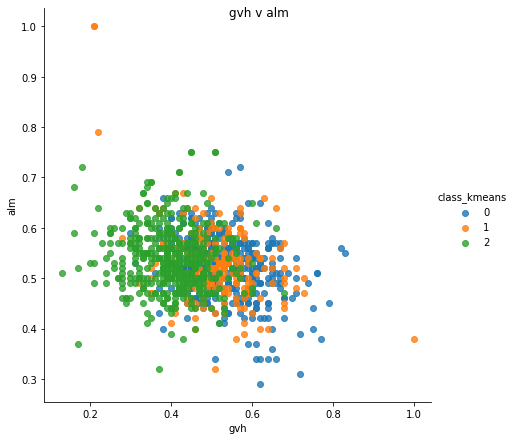

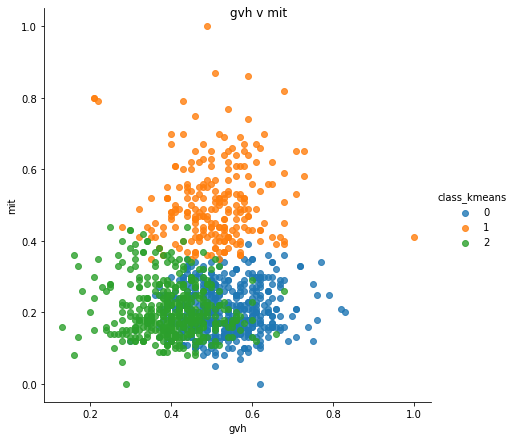

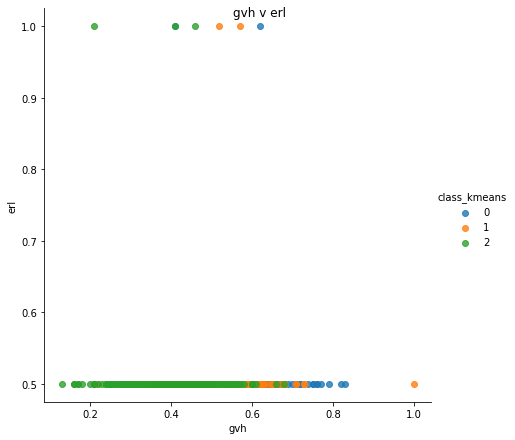

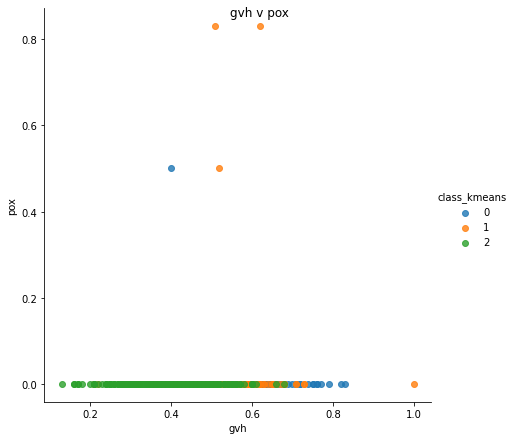

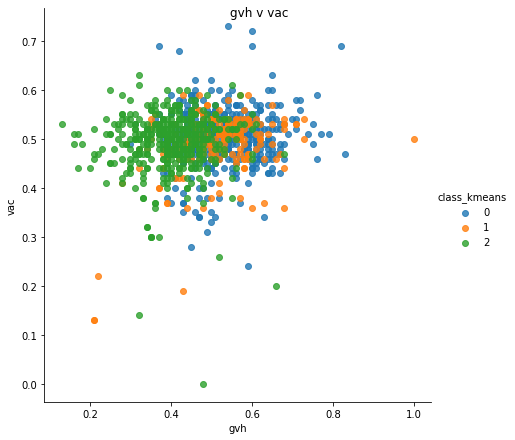

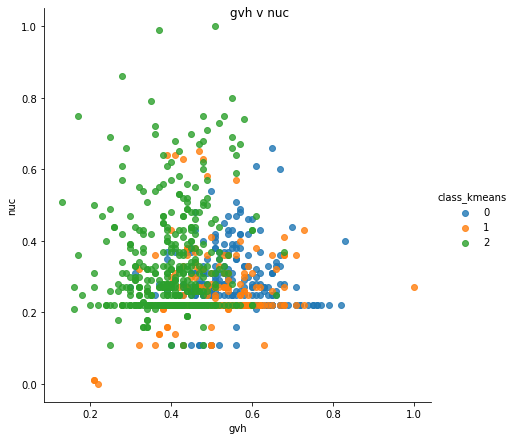

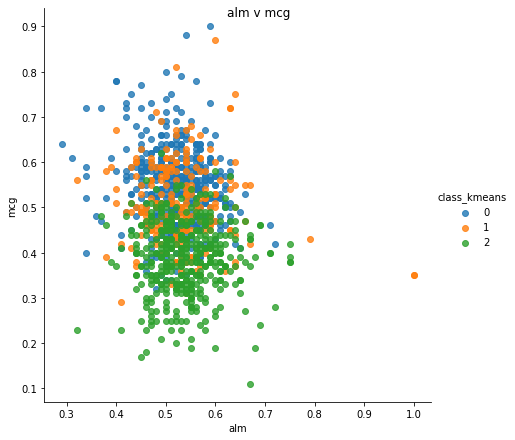

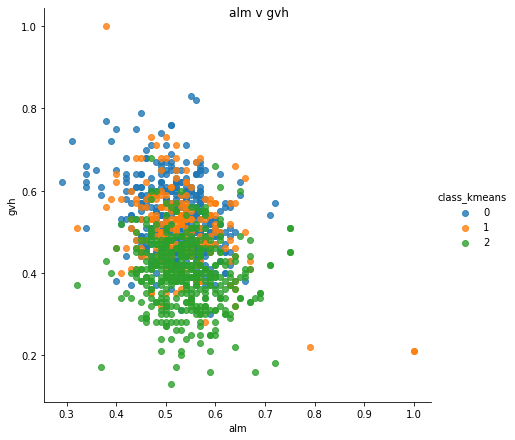

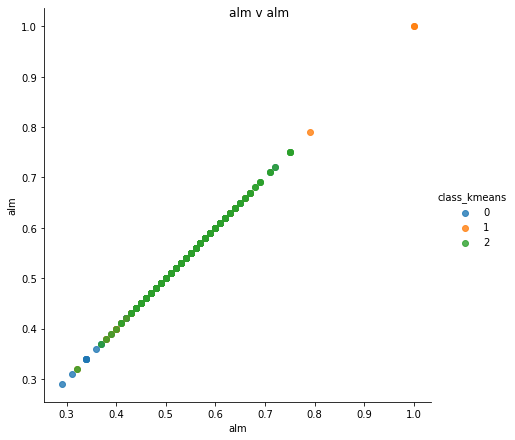

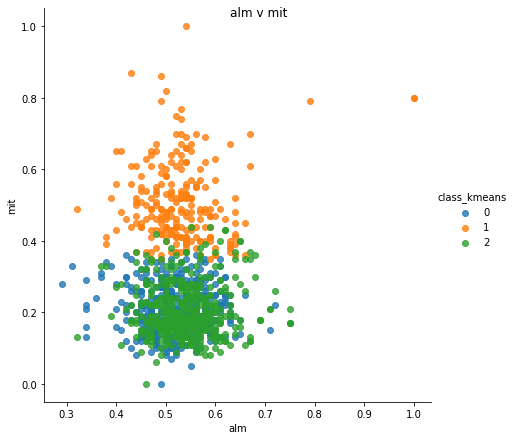

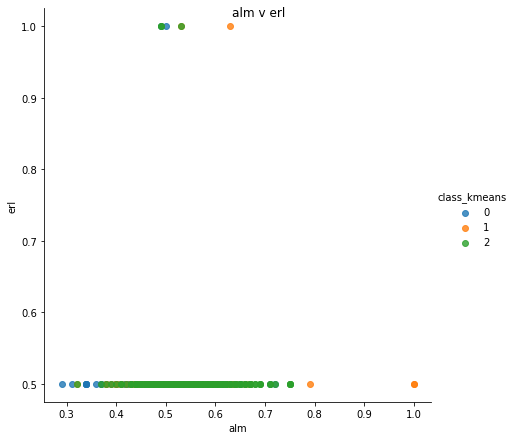

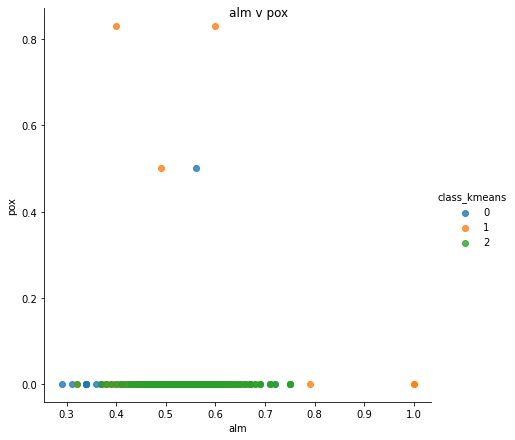

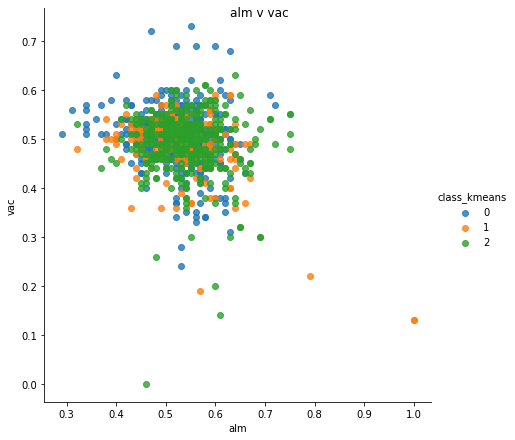

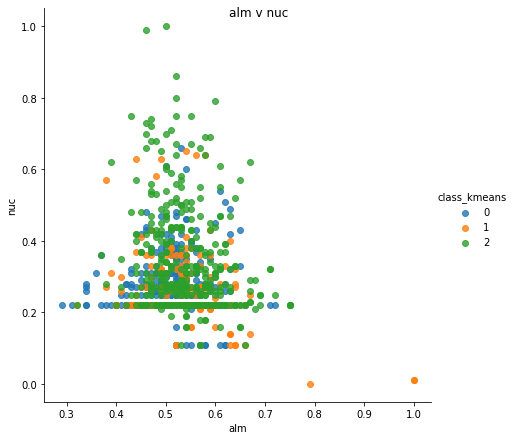

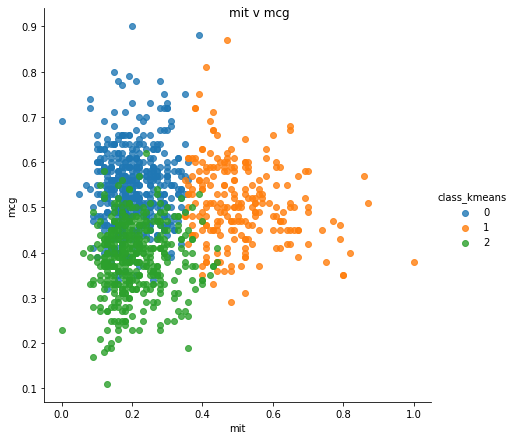

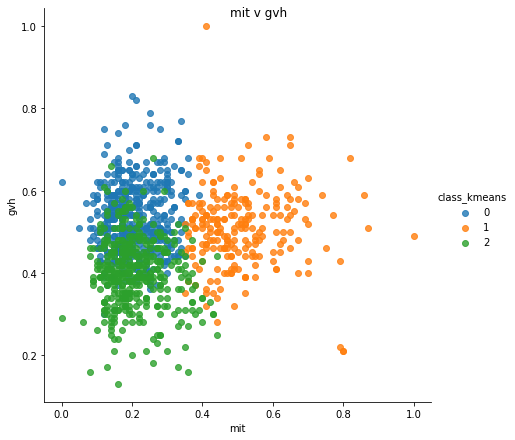

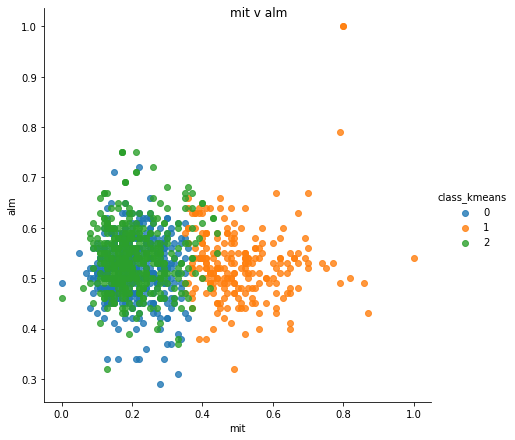

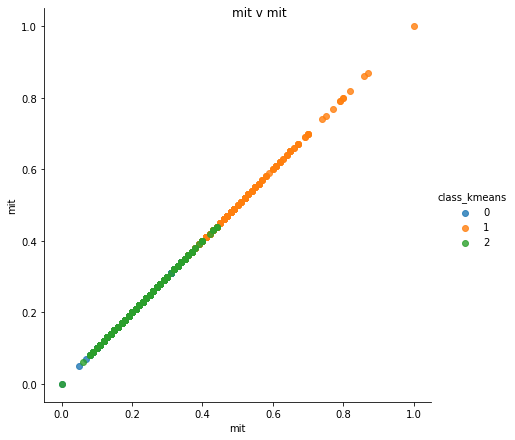

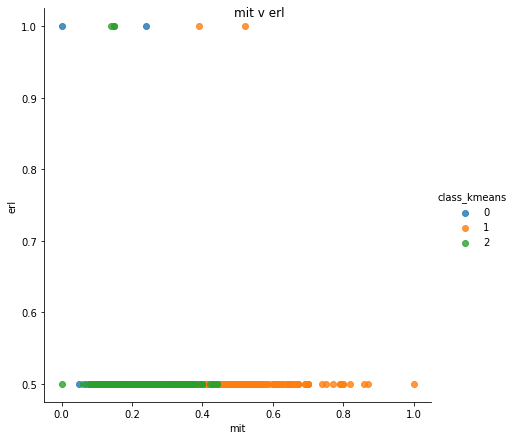

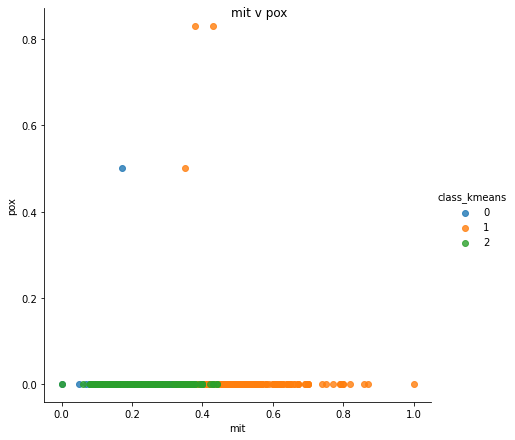

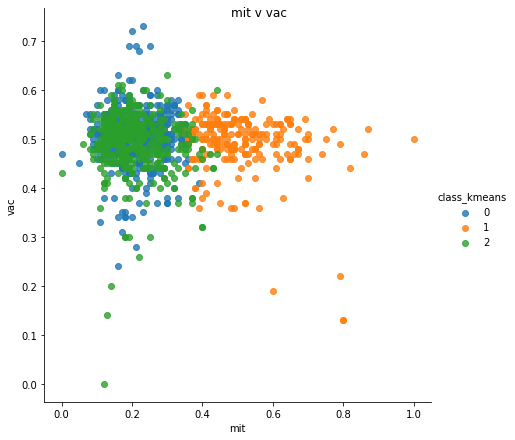

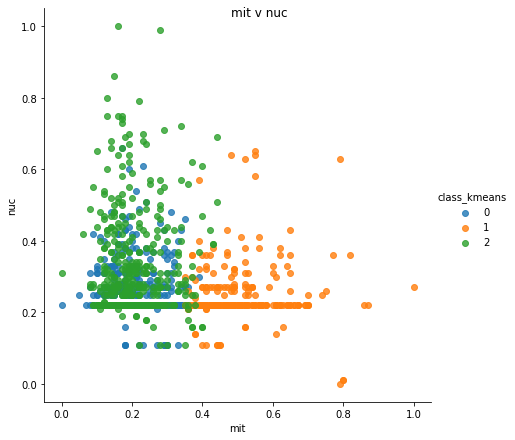

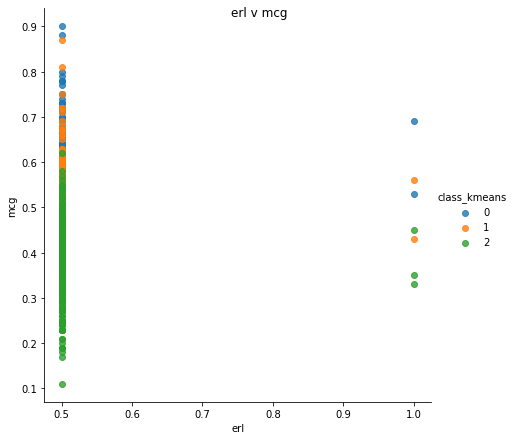

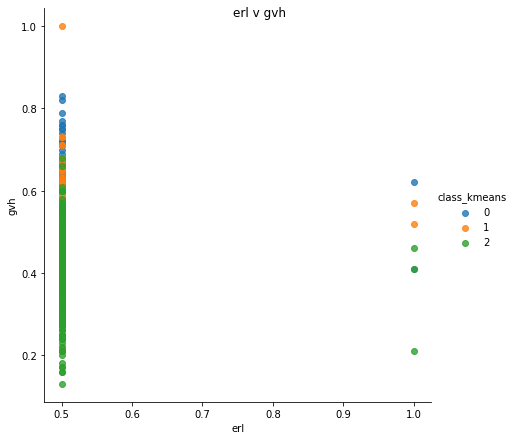

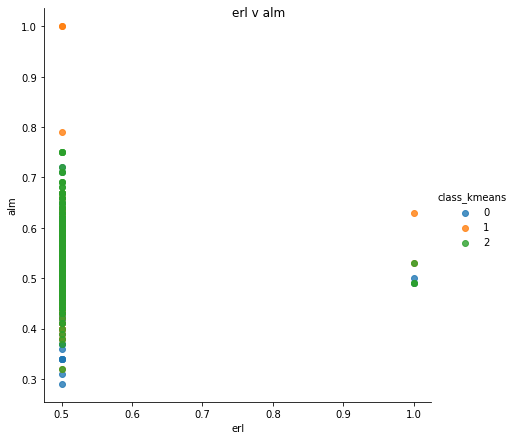

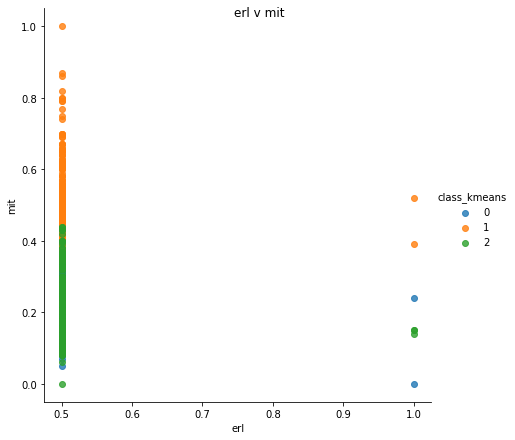

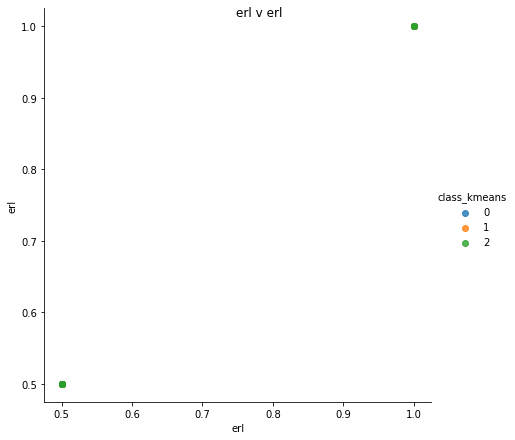

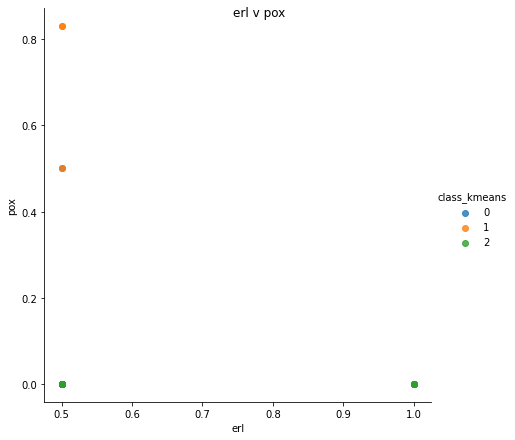

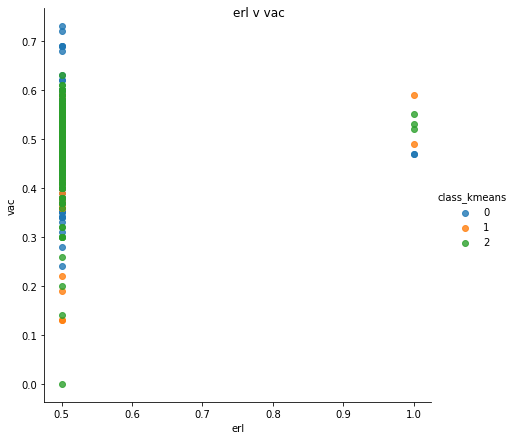

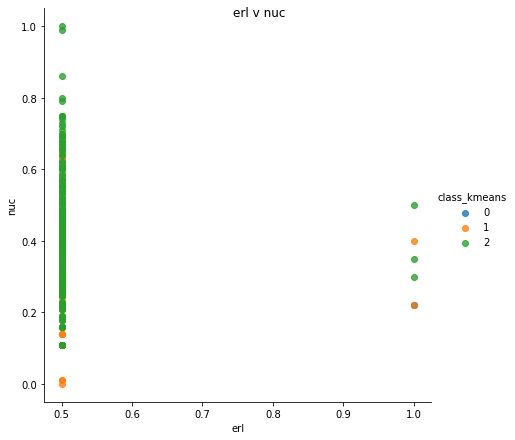

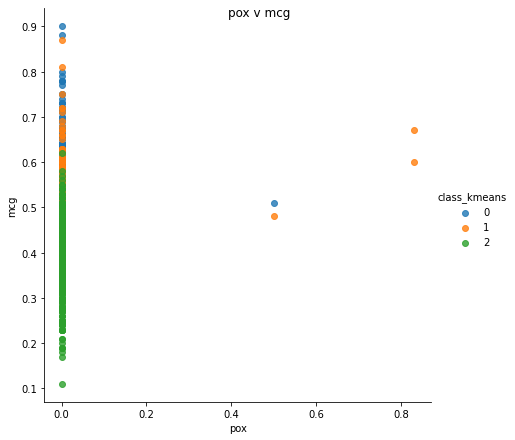

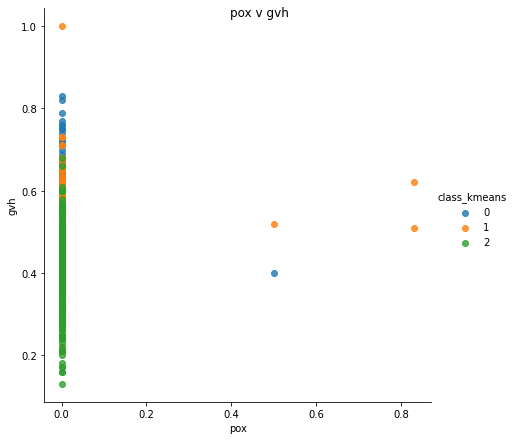

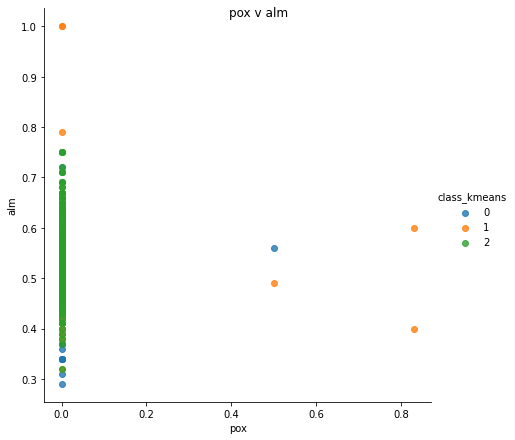

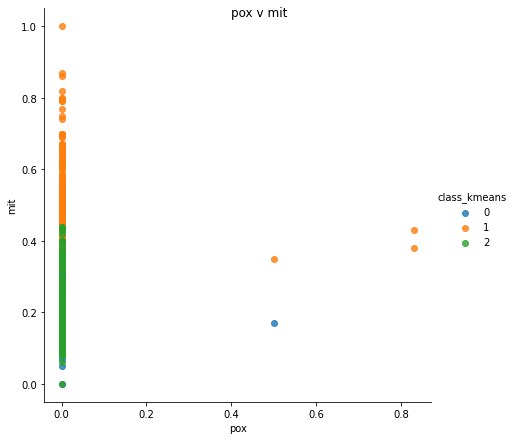

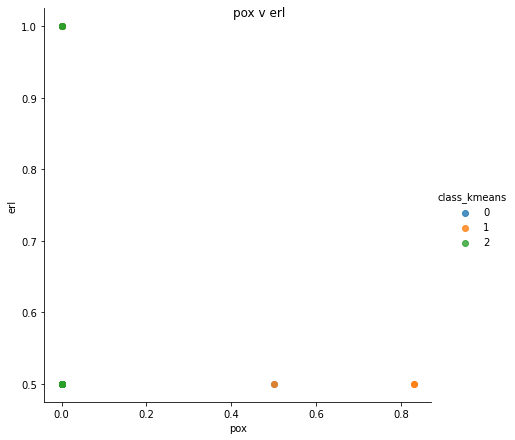

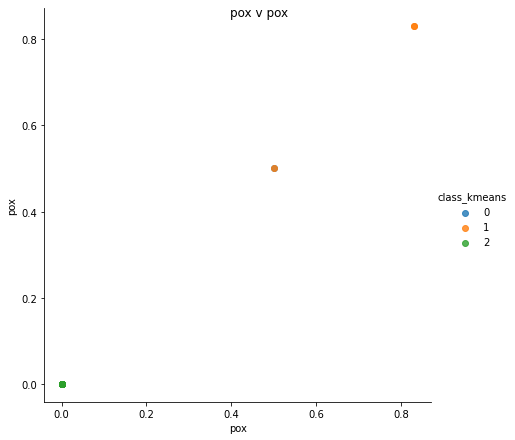

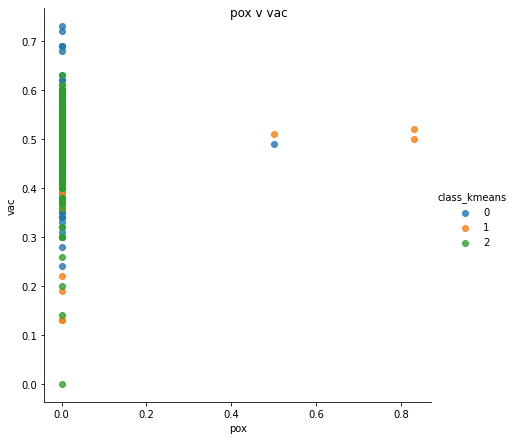

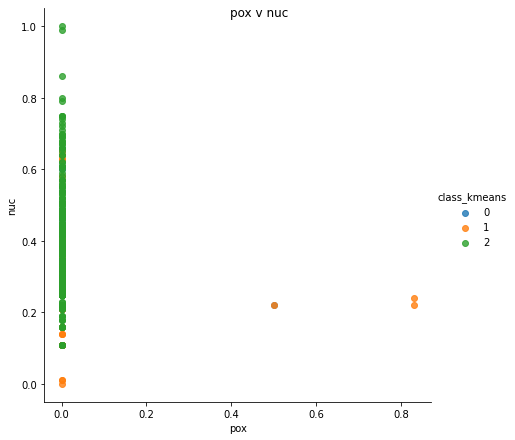

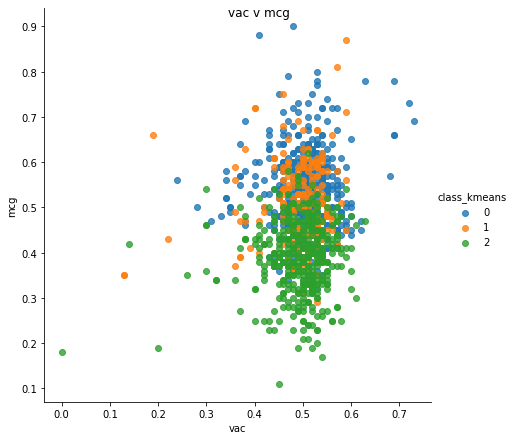

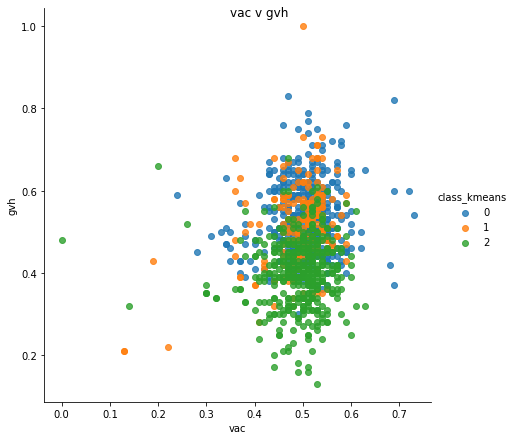

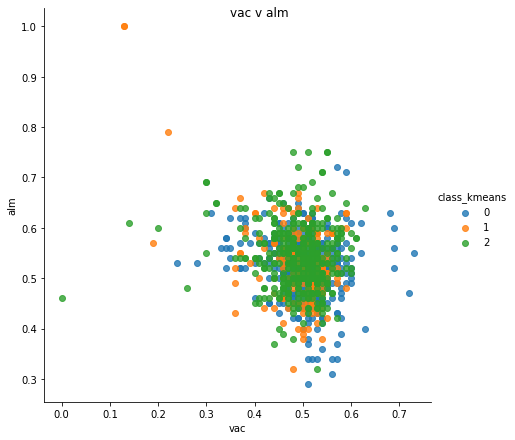

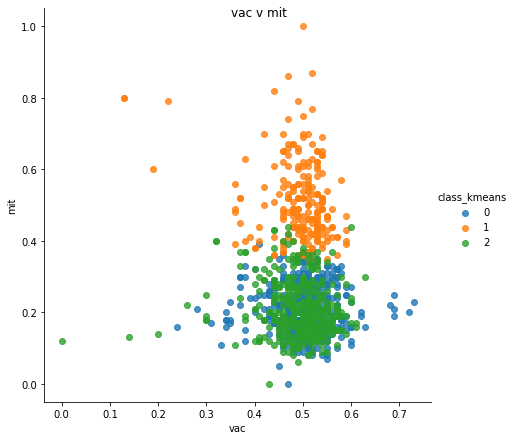

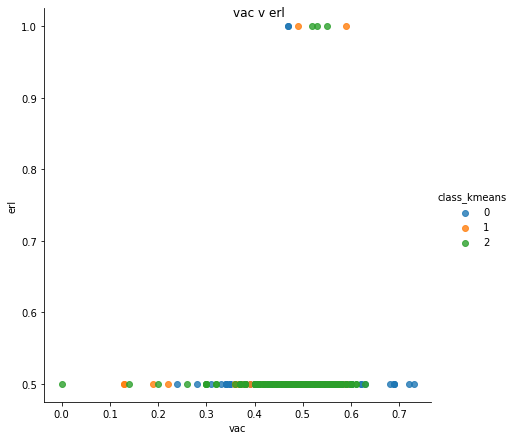

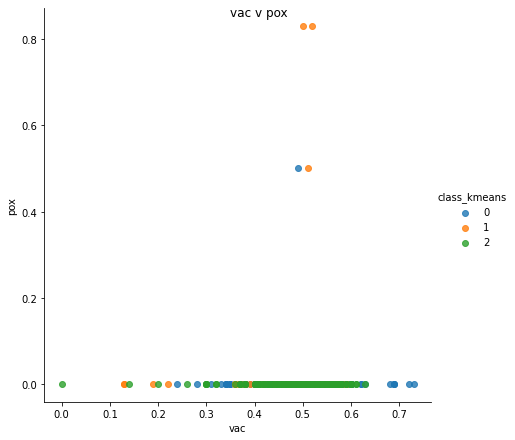

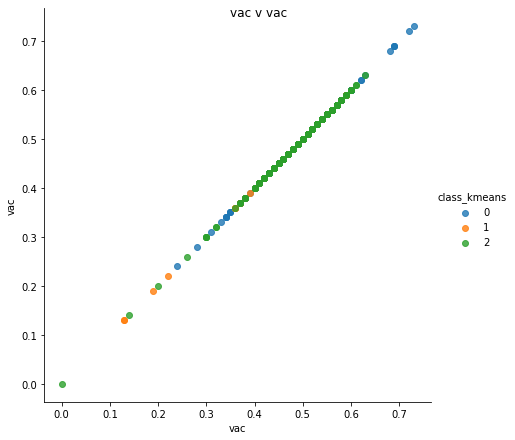

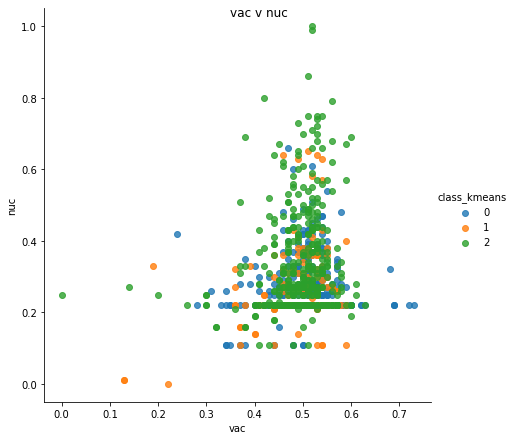

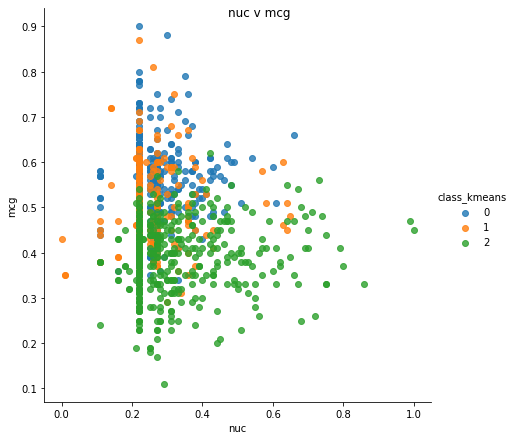

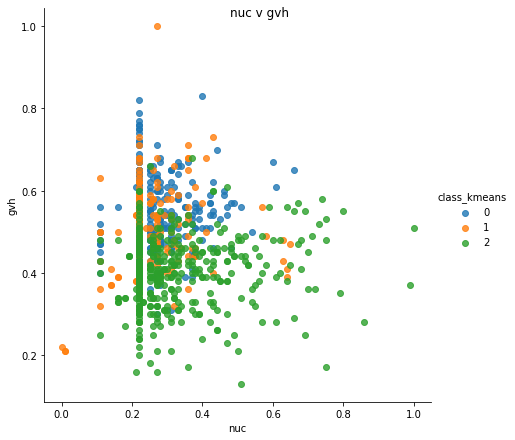

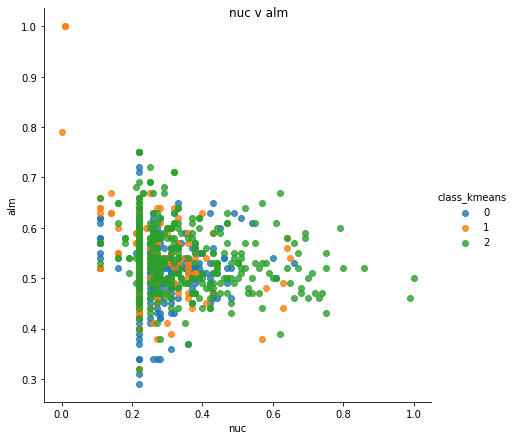

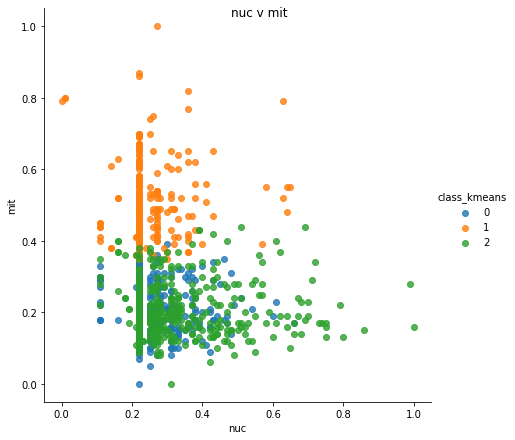

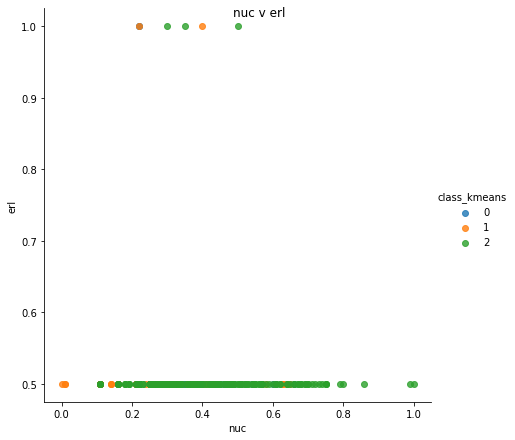

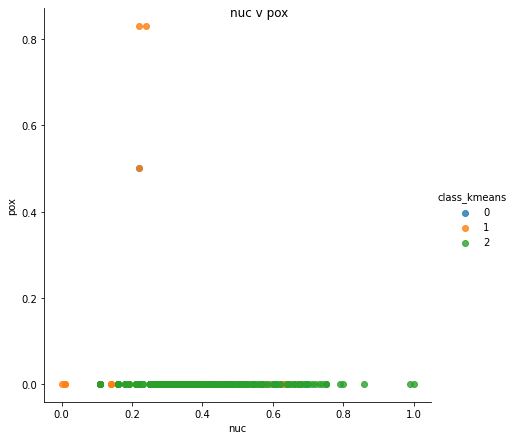

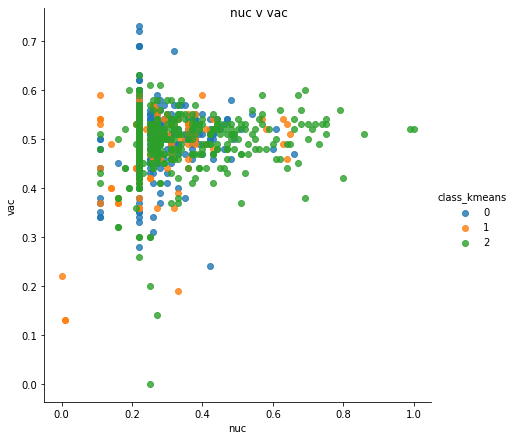

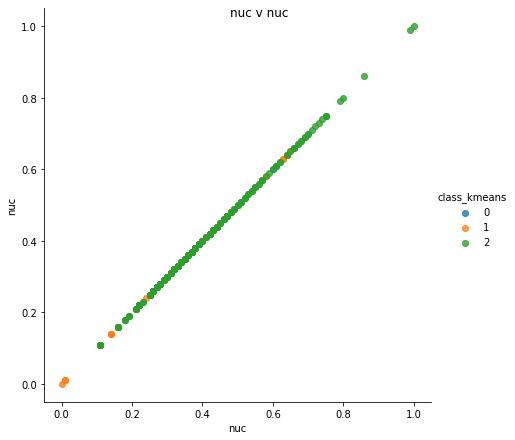

In [ ]:
for col in reduced_X.columns:
  for col2 in reduced_X.columns:
    sns.lmplot(x=col, y=col2, data=reduced_data_class, hue="class_kmeans", fit_reg=False, height=6, aspect=1).fig.suptitle(f"{col} v {col2}")
    plt.show()
    plt.close('all')